# 데이터 불러오기

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

plt.rcParams['font.family'] = 'AppleGothic'

file_path = '다문화최종데이터.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Display basic information and first few rows of the data
data_info = data.info()
data_head = data.head()

(data_info, data_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             25 non-null     object 
 1   2022_다문화가구원_소계  25 non-null     int64  
 2   2023_초등학교수      25 non-null     int64  
 3   2022 년_종류별 주택수  25 non-null     int64  
 4   어린이집개수          25 non-null     int64  
 5   도서관개수           25 non-null     int64  
 6   다문화언어강사인원       25 non-null     int64  
 7   2020_수준지수       25 non-null     float64
 8   2022_중점학교       25 non-null     int64  
 9   2022_특수학급       25 non-null     int64  
 10  2022_다문화출생신고수   25 non-null     int64  
 11  다문화수용성점수        25 non-null     float64
 12  다문화관련센터         25 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 2.7+ KB


(None,
    행정구  2022_다문화가구원_소계  2023_초등학교수  2022 년_종류별 주택수  어린이집개수  도서관개수  다문화언어강사인원  \
 0  종로구            3067          12           46810      71      9          6   
 1   중구            3372          12           42401      64      8          5   
 2  용산구            6020          15           77116     106      4          3   
 3  성동구            5730          21           90740     153      7          3   
 4  광진구            6623          21           93555     152      6          5   
 
    2020_수준지수  2022_중점학교  2022_특수학급  2022_다문화출생신고수  다문화수용성점수  다문화관련센터  
 0     482.96          0          0             61      6.12       18  
 1     957.61          2          2             57      6.20       13  
 2     124.60          3          3            134      7.99       13  
 3      83.99          2          2             75      6.60       23  
 4      39.01          0          2             63      5.26       24  )

# 정규화

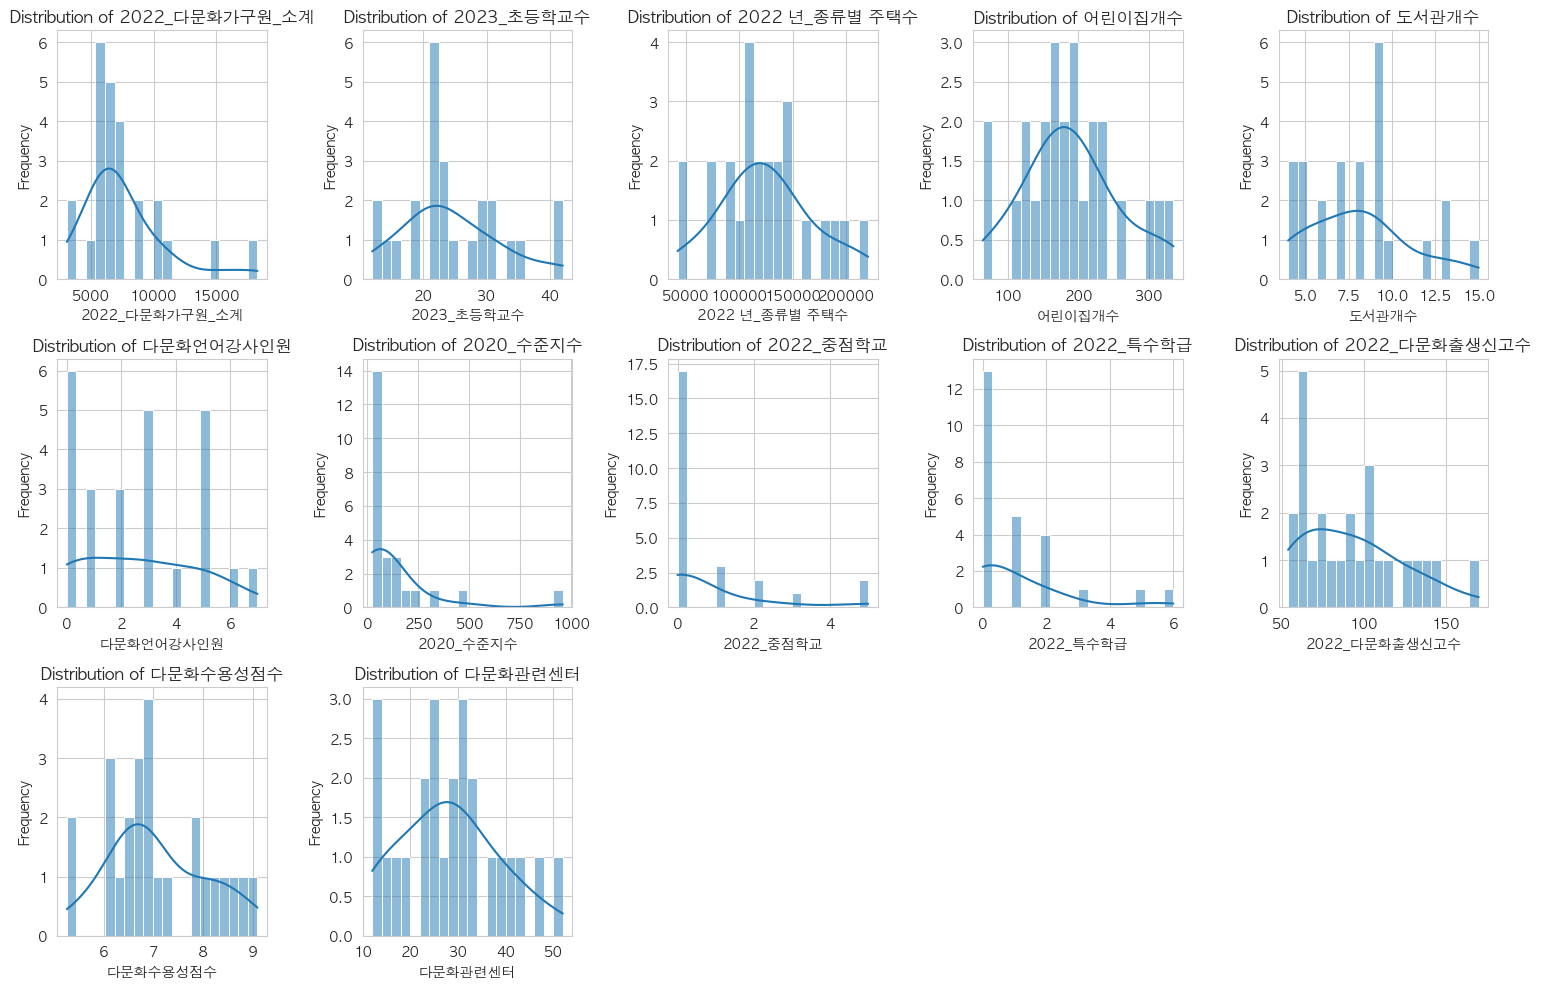

,2022_다문화가구원_소계,2023_초등학교수,2022 년_종류별 주택수,어린이집개수,도서관개수,다문화언어강사인원,2020_수준지수,2022_중점학교,2022_특수학급,2022_다문화출생신고수,다문화수용성점수,다문화관련센터
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.0000,25.000000,25.000000,25.000000
mean,7618.320000,24.280000,124452.920000,188.880000,8.040000,2.640000,133.027600,0.8,1.0800,93.200000,7.078800,28.120000
std,3393.079461,7.960946,44343.366423,69.128696,2.964793,2.157931,202.994295,1.5,1.6052,31.267662,1.009939,10.607859
min,3067.000000,12.000000,42401.000000,64.000000,4.000000,0.000000,23.480000,0.0,0.0000,54.000000,5.260000,12.000000
25%,6020.000000,21.000000,99477.000000,152.000000,6.000000,1.000000,30.580000,0.0,0.0000,63.000000,6.570000,22.000000
50%,6623.000000,23.000000,120374.000000,184.000000,8.000000,3.000000,58.610000,0.0,0.0000,89.000000,6.880000,29.000000
75%,8423.000000,29.000000,146886.000000,224.000000,9.000000,5.000000,124.600000,1.0,2.0000,110.000000,7.930000,33.000000
max,18320.000000,42.000000,220192.000000,335.000000,15.000000,7.000000,957.610000,5.0,6.0000,170.000000,9.100000,52.000000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
basic_stats = data.describe()

# Visualizing distributions
plt.figure(figsize=(15, 10))

# Iterate through numerical columns to create histograms
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

basic_stats


- z-score와 Min-max는 인구 변수의 크기가 너무 작아진다. 
- 로그 변환 진행

# 로그 변환

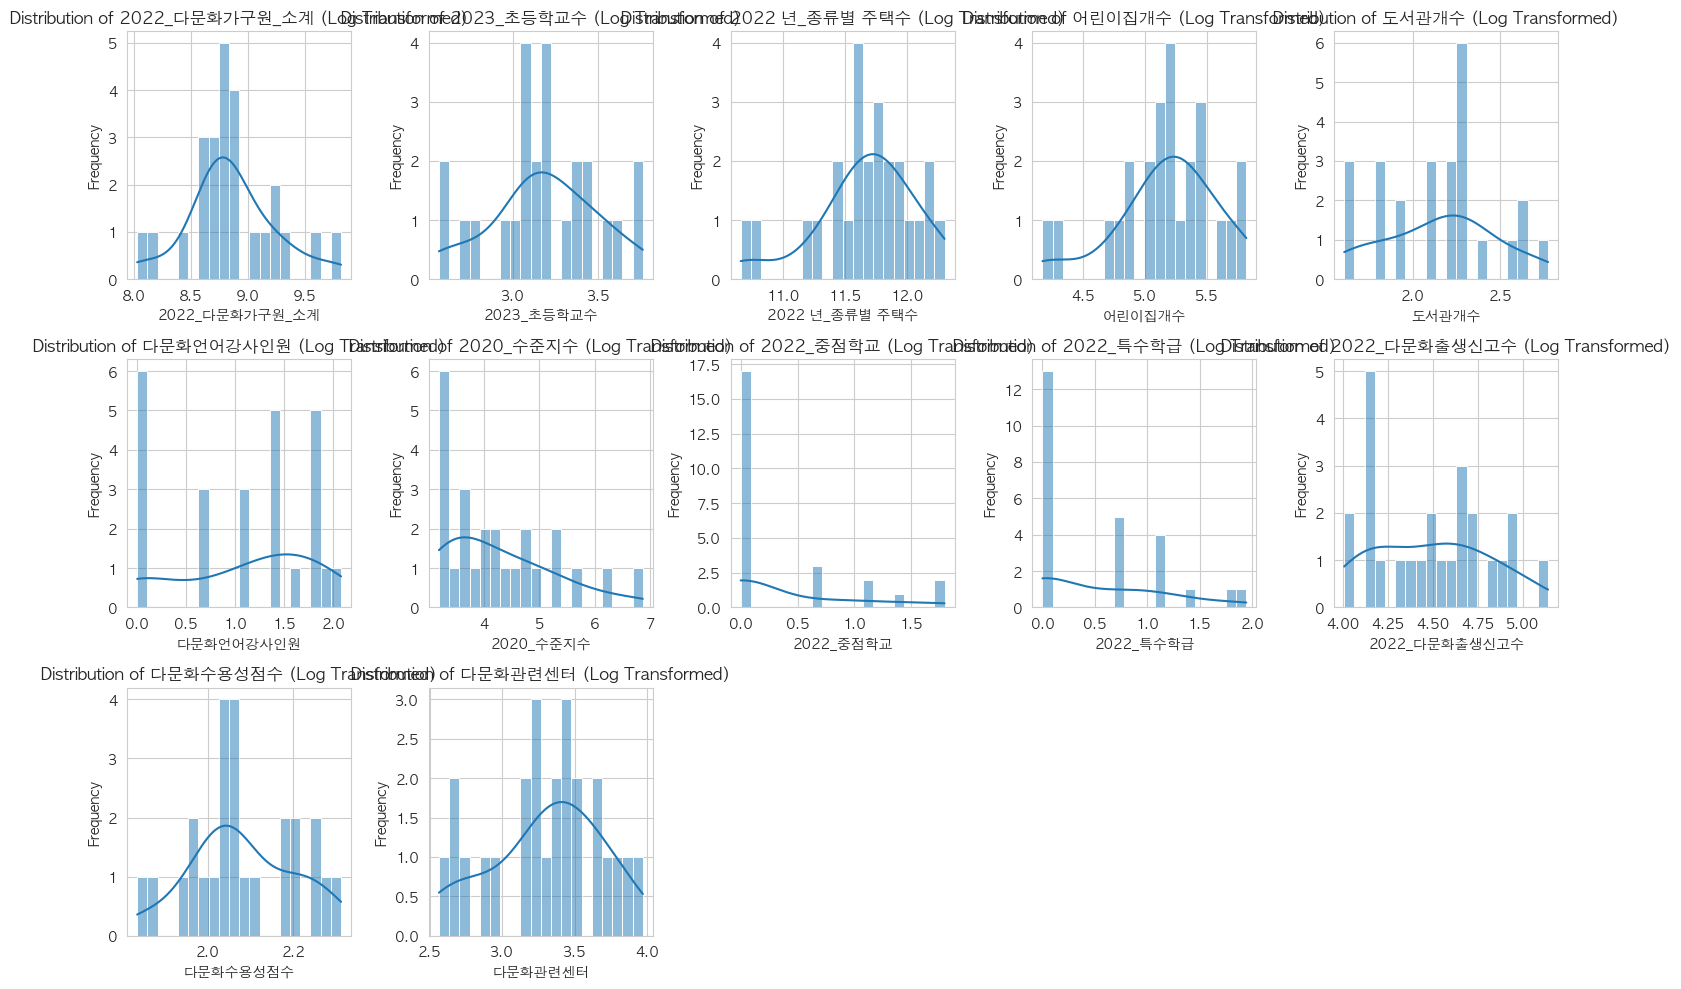

,행정구,2022_다문화가구원_소계,2023_초등학교수,2022 년_종류별 주택수,어린이집개수,도서관개수,다문화언어강사인원,2020_수준지수,2022_중점학교,2022_특수학급,2022_다문화출생신고수,다문화수용성점수,다문화관련센터
0,종로구,8.028781,2.564949,10.753873,4.276666,2.302585,1.945910,6.182002,0.000000,0.000000,4.127134,1.962908,2.944439
1,중구,8.123558,2.564949,10.654951,4.174387,2.197225,1.791759,6.865484,1.098612,1.098612,4.060443,1.974081,2.639057
2,용산구,8.703009,2.772589,11.253079,4.672829,1.609438,1.386294,4.833102,1.386294,1.386294,4.905275,2.196113,2.639057
3,성동구,8.653645,3.091042,11.415765,5.036953,2.079442,1.386294,4.442534,1.098612,1.098612,4.330733,2.028148,3.178054
4,광진구,8.798455,3.091042,11.446315,5.030438,1.945910,1.791759,3.689129,0.000000,1.098612,4.158883,1.834180,3.218876


In [50]:
import numpy as np

data_log_transformed = data.copy()
data_log_transformed[data.select_dtypes(include=['float64', 'int64']).columns] = np.log1p(
    data[data.select_dtypes(include=['float64', 'int64']).columns]
)

plt.figure(figsize=(15, 10))

for i, col in enumerate(data_log_transformed.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(data_log_transformed[col], bins=20, kde=True)
    plt.title(f'Distribution of {col} (Log Transformed)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

data_log_transformed.head()


# 최적 클러스터 개수 확인 

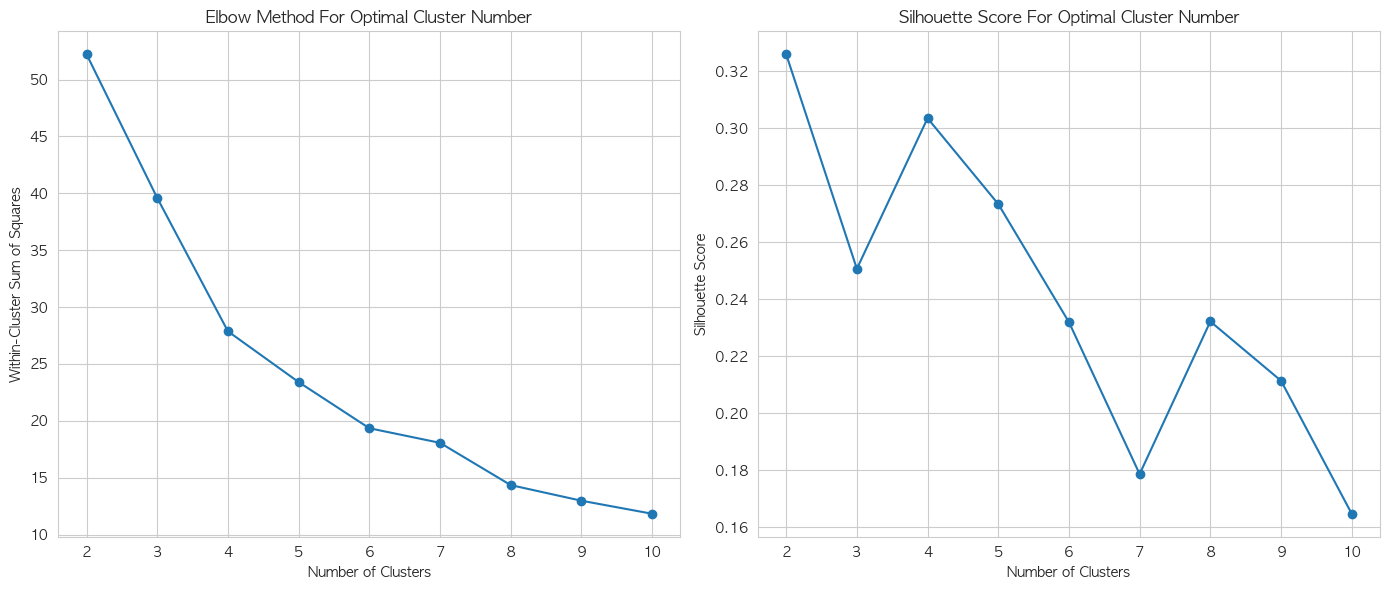

[(2, 52.22471825081446, 0.32602066566989757),
 (3, 39.59089587019672, 0.25074231470297326),
 (4, 27.866342919780426, 0.30358302367847523),
 (5, 23.402831258208536, 0.2734675097453468),
 (6, 19.34534460219556, 0.23200892884878355),
 (7, 18.059928943733073, 0.17869402094797784),
 (8, 14.344276131412176, 0.23225355115286045),
 (9, 12.971080607776582, 0.2114483393871624),
 (10, 11.82519442990359, 0.1647699406024525)]

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting only numerical columns for clustering
X = data_log_transformed.select_dtypes(include=['float64', 'int64'])

# Placeholder for SSE and silhouette scores
sse = []
silhouette_scores = []
max_clusters = 10  

for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) 
    silhouette_scores.append(silhouette_score(X, kmeans.labels_)) 

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters+1), sse, marker='o')
plt.title('Elbow Method For Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

list(zip(range(2, max_clusters+1), sse, silhouette_scores))


# PCA

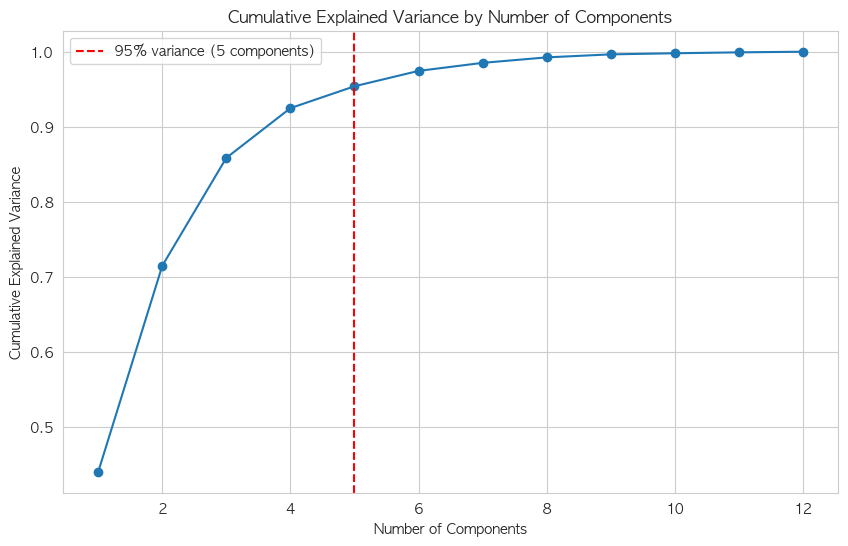

(5, 0.9539943047520849)

In [52]:
# Calculating PCA for all components
pca_full = PCA(n_components=None).fit(X)

explained_variance_ratio = pca_full.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

num_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1  # adding 1 as index starts from 0

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axvline(num_components_95, linestyle='--', color='red', label=f'95% variance ({num_components_95} components)')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

(num_components_95, cumulative_explained_variance[num_components_95 - 1])  # subtracting 1 as index starts from 0


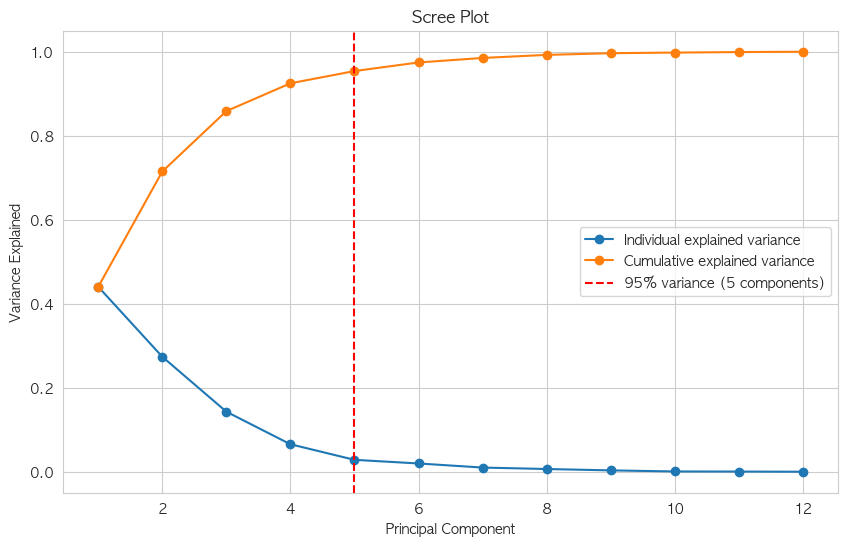

In [53]:
# Plotting Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', label='Cumulative explained variance')
plt.axvline(num_components_95, linestyle='--', color='red', label=f'95% variance ({num_components_95} components)')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)
plt.show()


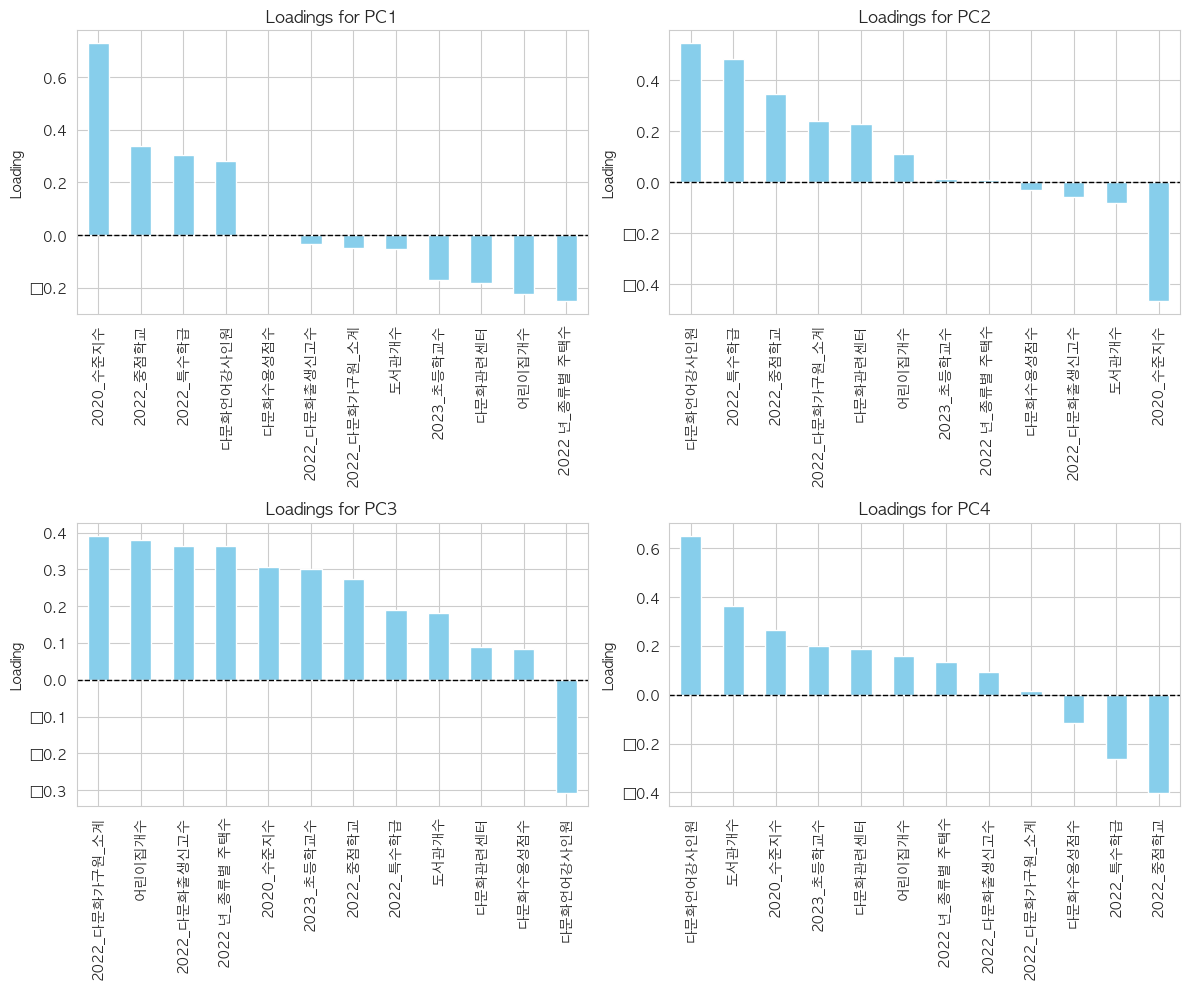

,PC1,PC2,PC3,PC4
2022_다문화가구원_소계,-0.051001,0.237862,0.391608,0.015681
2023_초등학교수,-0.171410,0.011880,0.300216,0.198939
2022 년_종류별 주택수,-0.250396,0.010127,0.362486,0.134881
어린이집개수,-0.225629,0.110328,0.380923,0.157636
도서관개수,-0.053070,-0.083487,0.181147,0.364998
다문화언어강사인원,0.281513,0.544414,-0.309096,0.651725
2020_수준지수,0.729586,-0.465688,0.305913,0.264361
2022_중점학교,0.336865,0.346876,0.273633,-0.404510
2022_특수학급,0.303471,0.483303,0.190528,-0.262141
2022_다문화출생신고수,-0.033633,-0.058088,0.363730,0.092480


In [54]:
# Getting the PCA loadings
loadings = pd.DataFrame(pca_full.components_[:4, :].T,  # Transposing to have components as columns
                        columns=[f'PC{i}' for i in range(1, 5)],
                        index=X.columns)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    loadings_sorted = loadings.iloc[:, i].sort_values(ascending=False)
    loadings_sorted.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Loadings for PC{i+1}')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.set_xlabel('')
    ax.set_ylabel('Loading')
    
plt.tight_layout()
plt.show()

loadings


pc4는 pc3과 비슷해서 빠져도 될듯 빠져도 87%이상 확보됨

# 클러스터 kmeans

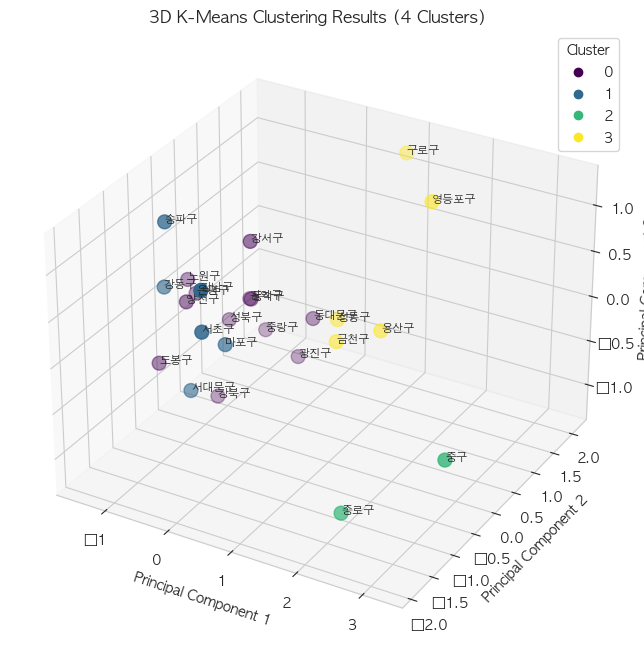

In [55]:
from scipy.cluster.hierarchy import fcluster
# 1. K-Means Clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
data_log_transformed['Cluster_KMeans_4'] = kmeans_4.fit_predict(pca_transformed_data[:, :4])

# Creating a DataFrame with the first 3 principal components for 3D visualization
pc_df_3d_kmeans_4 = pd.DataFrame(data=pca_transformed_data[:, :3], columns=['PC1', 'PC2', 'PC3'])
pc_df_3d_kmeans_4['Cluster_KMeans_4'] = data_log_transformed['Cluster_KMeans_4']
pc_df_3d_kmeans_4['행정구'] = data['행정구']

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df_3d_kmeans_4['PC1'], pc_df_3d_kmeans_4['PC2'], pc_df_3d_kmeans_4['PC3'], 
                     c=pc_df_3d_kmeans_4['Cluster_KMeans_4'], cmap='viridis', s=100)

# Adding labels
for i in range(pc_df_3d_kmeans_4.shape[0]):
    ax.text(pc_df_3d_kmeans_4['PC1'][i], pc_df_3d_kmeans_4['PC2'][i], pc_df_3d_kmeans_4['PC3'][i], 
            pc_df_3d_kmeans_4['행정구'][i], fontsize=8)

ax.set_title('3D K-Means Clustering Results (4 Clusters)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


# 계층적 군집화

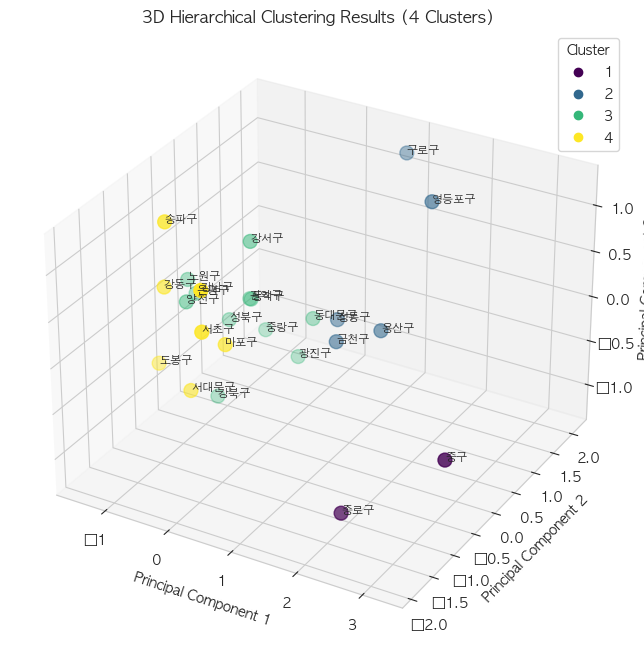

In [56]:
# 2. Hierarchical Clustering with 4 clusters
# Cutting the dendrogram at a distance that results in 4 clusters
data_log_transformed['Cluster_Hierarchical_4'] = fcluster(linked, t=4, criterion='maxclust')

# Creating a DataFrame with the first 3 principal components for 3D visualization
pc_df_3d_hierarchical_4 = pd.DataFrame(data=pca_transformed_data[:, :3], columns=['PC1', 'PC2', 'PC3'])
pc_df_3d_hierarchical_4['Cluster_Hierarchical_4'] = data_log_transformed['Cluster_Hierarchical_4']
pc_df_3d_hierarchical_4['행정구'] = data['행정구']

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df_3d_hierarchical_4['PC1'], pc_df_3d_hierarchical_4['PC2'], pc_df_3d_hierarchical_4['PC3'], 
                     c=pc_df_3d_hierarchical_4['Cluster_Hierarchical_4'], cmap='viridis', s=100)

# Adding labels
for i in range(pc_df_3d_hierarchical_4.shape[0]):
    ax.text(pc_df_3d_hierarchical_4['PC1'][i], pc_df_3d_hierarchical_4['PC2'][i], pc_df_3d_hierarchical_4['PC3'][i], 
            pc_df_3d_hierarchical_4['행정구'][i], fontsize=8)

ax.set_title('3D Hierarchical Clustering Results (4 Clusters)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


# GMM

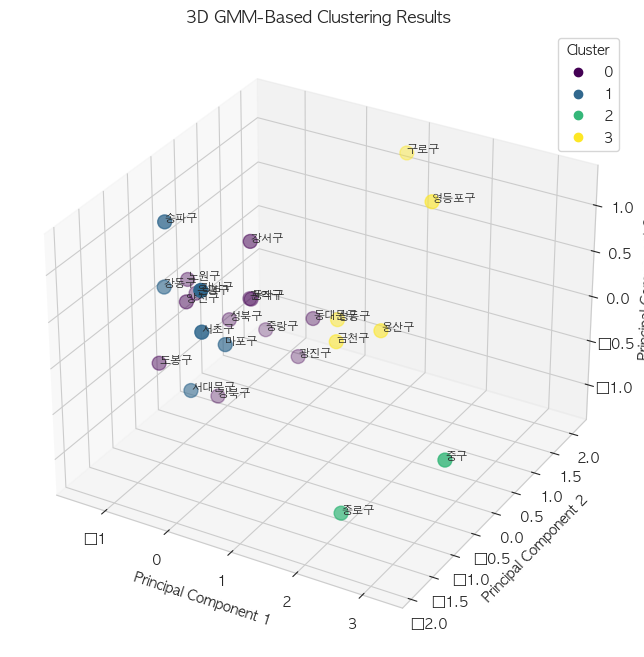

In [63]:
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# Fitting GMM
gmm = GaussianMixture(n_components=4, random_state=42)
data_log_transformed['Cluster_GMM'] = gmm.fit_predict(pca_transformed_data[:, :4])

# Creating a DataFrame with the first 3 principal components
pc_df_3d_gmm = pd.DataFrame(data=pca_transformed_data[:, :3], columns=['PC1', 'PC2', 'PC3'])
pc_df_3d_gmm['Cluster_GMM'] = data_log_transformed['Cluster_GMM']
pc_df_3d_gmm['행정구'] = data['행정구']

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df_3d_gmm['PC1'], pc_df_3d_gmm['PC2'], pc_df_3d_gmm['PC3'], c=pc_df_3d_gmm['Cluster_GMM'], cmap='viridis', s=100)

# Adding labels
for i in range(pc_df_3d_gmm.shape[0]):
    ax.text(pc_df_3d_gmm['PC1'][i], pc_df_3d_gmm['PC2'][i], pc_df_3d_gmm['PC3'][i], pc_df_3d_gmm['행정구'][i], fontsize=8)

ax.set_title('3D GMM-Based Clustering Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


# SpectralClustring

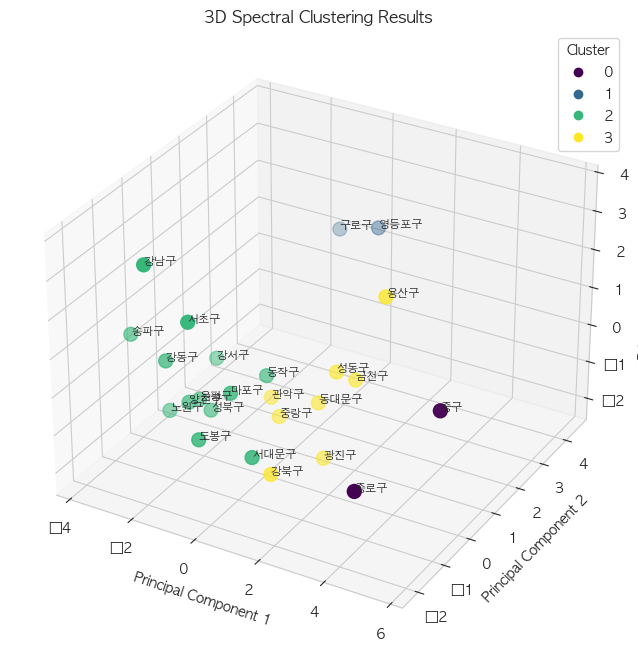

In [70]:
from sklearn.cluster import SpectralClustering
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Fitting Spectral Clustering
n_clusters = 4
spectral = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
data['Cluster_Spectral'] = spectral.fit_predict(data_normalized)

# Creating a DataFrame with the first 3 principal components
pc_df_3d_spectral = pc_df_3d.copy()
pc_df_3d_spectral['Cluster_Spectral'] = data['Cluster_Spectral']
pc_df_3d_spectral['행정구'] = data['행정구']

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df_3d_spectral['PC1'], pc_df_3d_spectral['PC2'], pc_df_3d_spectral['PC3'], c=pc_df_3d_spectral['Cluster_Spectral'], cmap='viridis', s=100)

# Adding labels
for i in range(pc_df_3d_spectral.shape[0]):
    ax.text(pc_df_3d_spectral['PC1'][i], pc_df_3d_spectral['PC2'][i], pc_df_3d_spectral['PC3'][i], pc_df_3d_spectral['행정구'][i], fontsize=8)

ax.set_title('3D Spectral Clustering Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()
